In [1]:
from skimage import io, img_as_float
import numpy as np
import matplotlib.pyplot as plt

In [21]:
noise = np.random.normal(loc=0, scale=1, size=image.shape)

In [24]:
image.shape

(602, 602, 3)

In [23]:
noise

array([[[ 4.81325254e-02,  3.03320751e+00, -7.63107885e-02],
        [ 3.19730823e-01, -2.85557903e-01, -2.74985715e-01],
        [-3.90330609e-02, -2.38503091e-01,  6.50869574e-01],
        ...,
        [-6.29588523e-01,  1.30339358e+00, -9.14567149e-01],
        [ 1.02747893e+00, -2.67056788e-02, -1.44739930e+00],
        [-9.97565559e-02, -5.71638026e-01,  9.14174162e-01]],

       [[-9.47888774e-01, -1.15941661e+00,  1.43099526e+00],
        [-1.35444802e+00, -9.40425347e-01, -1.45365133e+00],
        [-1.84752422e+00, -5.36499247e-01, -5.61045046e-01],
        ...,
        [-2.62329159e-01, -1.28964983e+00,  5.28263025e-01],
        [-1.50945685e+00, -3.69054288e-02, -1.67092546e-01],
        [ 7.24417103e-01, -4.48827231e-01, -2.17631055e-01]],

       [[ 7.13254650e-01,  1.34372446e+00, -6.11734001e-01],
        [ 1.19920339e-01,  1.48513157e+00, -5.01267975e-01],
        [-2.28073722e+00, -1.36758058e+00,  6.90222688e-01],
        ...,
        [ 1.06243508e+00, -7.26884150e-01,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


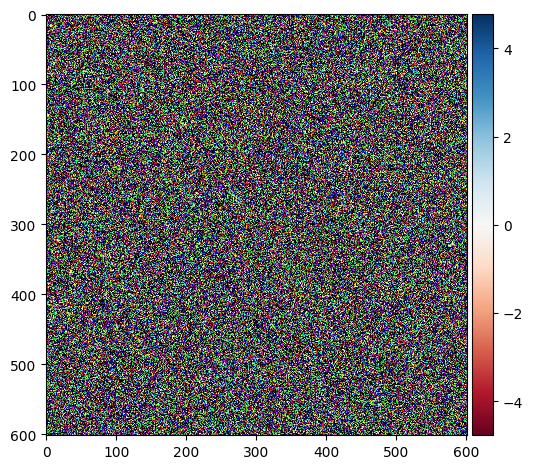

In [ ]:
io.imshow(noise)

In [2]:
def add_noise(image, p):
    
    image = img_as_float(image)
    
    # Generate Gaussian noise
    noise = np.random.normal(loc=0, scale=1, size=image.shape)
    
    # Apply the transformation equation
    noisy_image = np.sqrt(1 - p) * image + np.sqrt(p) * noise
    
    return noisy_image

In [3]:
def make_noise(image, p, T):
    
    noisy_image = img_as_float(image)
    
    for i in range(T):
    
        # Generate Gaussian noise
        noise = np.random.normal(loc=0, scale=1, size=image.shape)
    
        # Apply the transformation equation
        noisy_image = np.sqrt(1 - p) * noisy_image + np.sqrt(p) * noise
        
    
    
    return noisy_image

In [4]:
image1 = io.imread('/Users/canerozer/Desktop/Summer_Research/code/Diffusion_Model/canerozerphoto.jpg')
imgg= img_as_float(image1)
imgg

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.13333333, 0.12156863, 0.14901961],
        [0.14901961, 0.14117647, 0.16078431],
        [0.14901961, 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


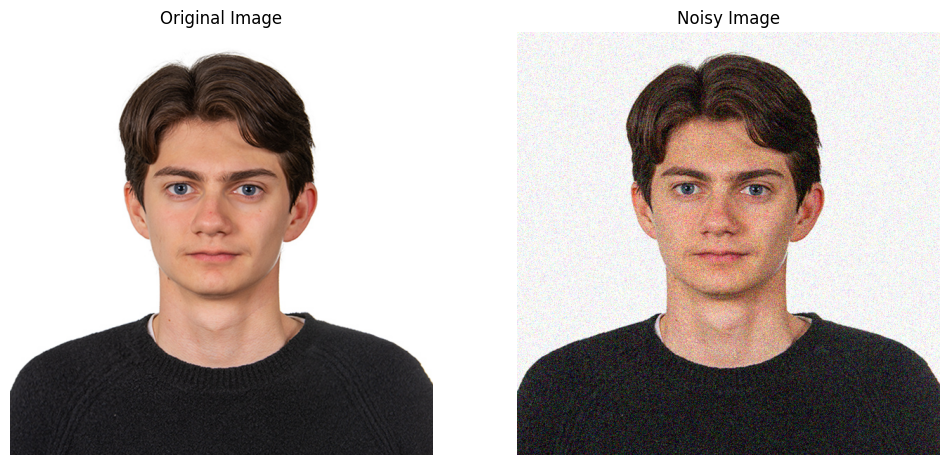

In [5]:
p = 0.01  
noisy_image = add_noise(image1, p)

# Display the original and noisy images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image1, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(noisy_image, cmap='gray')
ax[1].set_title('Noisy Image')
ax[1].axis('off')

plt.show()

In textbook, it gives p=0.03 and T=100.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


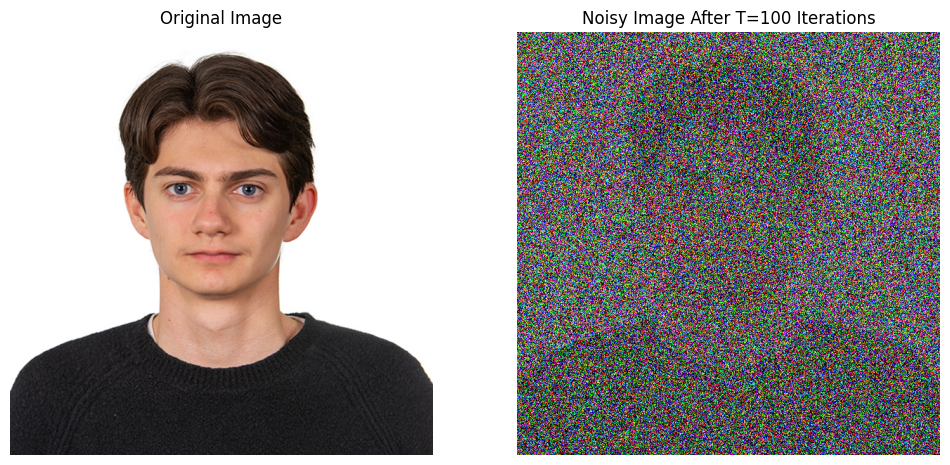

In [6]:
p = 0.03
T=100
noisy_image = make_noise(image1, p, T)

# Display the original and noisy images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image1, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(noisy_image, cmap='gray')
ax[1].set_title(f'Noisy Image After T={T} Iterations')
ax[1].axis('off')

plt.show()

In [31]:
noisy_image0 = add_noise(image1, p)

In [32]:
original_image_rgb_values={'r':noisy_image0[:,:,0].flatten(),'g':noisy_image0[:,:,1].flatten(),'b':noisy_image0[:,:,2].flatten()}
noisy_image_rgb_values={'r':noisy_image[:,:,0].flatten(),'g':noisy_image[:,:,1].flatten(),'b':noisy_image[:,:,2].flatten()}




In [33]:
original_image_rgb_values['r']

array([1.31020469, 1.1196881 , 0.93973199, ..., 0.27383741, 0.22119016,
       0.04142651])

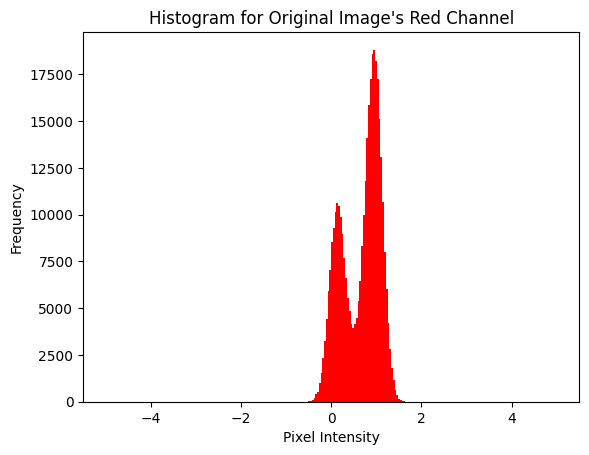

In [35]:
plt.hist(original_image_rgb_values['r'], bins=256, range=(-5, 5),color='red')
plt.title("Histogram for Original Image's Red Channel")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

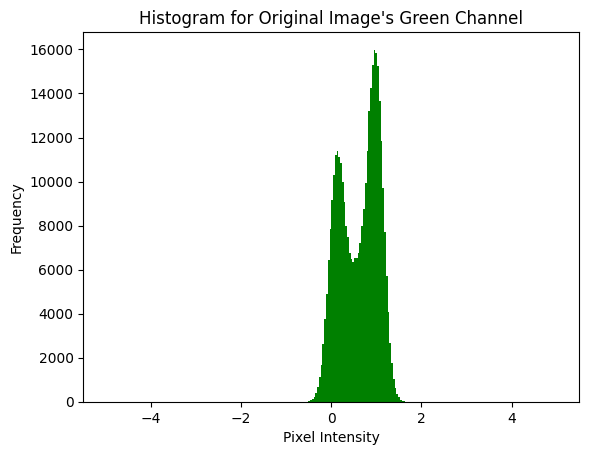

In [38]:
plt.hist(original_image_rgb_values['g'], bins=256, range=(-5, 5),color='green')
plt.title("Histogram for Original Image's Green Channel")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

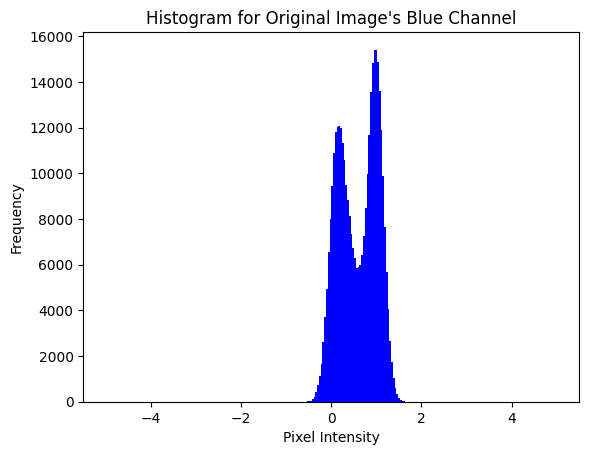

In [39]:
plt.hist(original_image_rgb_values['b'], bins=256, range=(-5, 5),color='blue')
plt.title("Histogram for Original Image's Blue Channel")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

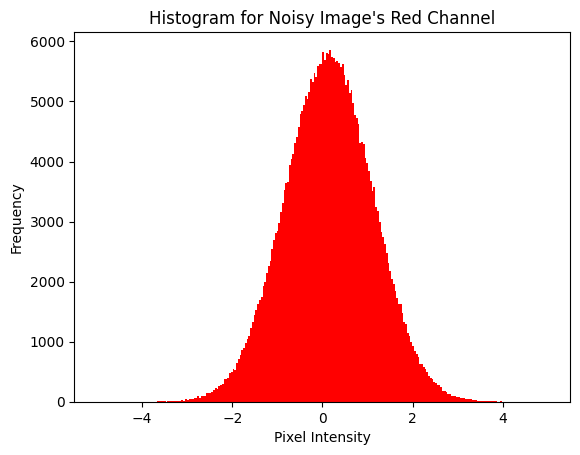

In [43]:
plt.hist(noisy_image_rgb_values['r'], bins=256, range=(-5, 5),color='red')
plt.title("Histogram for Noisy Image's Red Channel")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

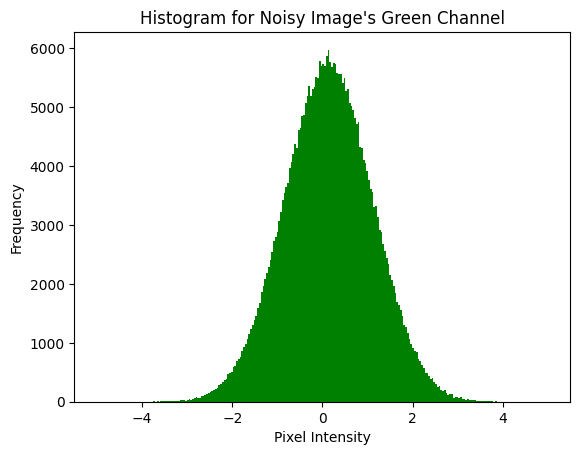

In [44]:
plt.hist(noisy_image_rgb_values['g'], bins=256, range=(-5, 5),color='green')
plt.title("Histogram for Noisy Image's Green Channel")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

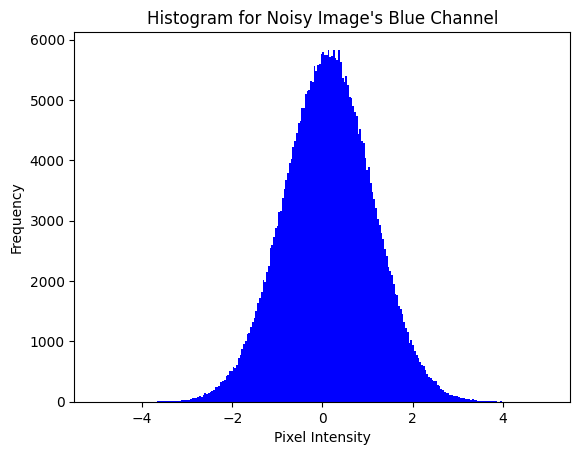

In [45]:
plt.hist(noisy_image_rgb_values['b'], bins=256, range=(-5, 5),color='blue')
plt.title("Histogram for Noisy Image's Blue Channel")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()